<a href="https://colab.research.google.com/github/priyarajmohan/ML_projects/blob/main/unsupervised_Kmeans_clustering_PCA_genai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import silhouette_score


In [ ]:
genai = pd.read_csv('/content/generative_ai_misinformation_dataset.csv')

In [ ]:
genai

,id,post_id,platform,timestamp,date,time,month,weekday,country,city,...,sentiment_score,toxicity_score,model_signature,detected_synthetic_score,embedding_sim_to_facts,factcheck_verdict,external_factchecks_count,source_domain_reliability,engagement,is_misinformation
0,1,P0001,Reddit,2024-03-06 10:01:00,2024-03-06,10:01:00,March,Wednesday,USA,New York,...,-0.223,0.271,GPT-like,0.829,0.357,TRUE,4,0.543,3899,1
1,2,P0002,Reddit,2025-08-07 18:30:00,2025-08-07,18:30:00,August,Thursday,Germany,Berlin,...,-0.718,0.802,GPT-like,0.075,0.987,FALSE,3,0.199,7651,0
2,3,P0003,Telegram,2024-12-13 03:15:00,2024-12-13,03:15:00,December,Friday,USA,New York,...,-0.989,0.815,GPT-like,0.707,0.729,PARTLY,0,0.074,7260,0
3,4,P0004,Twitter,2024-04-05 07:10:00,2024-04-05,07:10:00,April,Friday,USA,Chicago,...,-0.283,0.116,human,0.863,0.623,FALSE,2,0.064,7454,1
4,5,P0005,Telegram,2024-06-07 06:18:00,2024-06-07,06:18:00,June,Friday,Germany,Hamburg,...,-0.378,0.325,GPT-like,0.730,0.638,PARTLY,0,0.472,8320,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,P0496,Reddit,2024-07-31 17:25:00,2024-07-31,17:25:00,July,Wednesday,UK,Birmingham,...,-0.602,0.418,human,0.751,0.101,FALSE,5,0.276,5181,0
496,497,P0497,Telegram,2024-08-13 02:42:00,2024-08-13,02:42:00,August,Tuesday,Germany,Berlin,...,-0.136,0.980,GPT-like,0.068,0.519,TRUE,5,0.971,8784,0
497,498,P0498,Facebook,2025-02-01 21:59:00,2025-02-01,21:59:00,February,Saturday,UK,London,...,-0.773,0.404,human,0.738,0.705,FALSE,3,0.347,8372,0
498,499,P0499,Twitter,2024-08-26 00:39:00,2024-08-26,00:39:00,August,Monday,Brazil,Brasilia,...,-0.205,0.264,human,0.205,0.483,PARTLY,2,0.287,8171,1


In [ ]:
genai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         500 non-null    int64  
 1   post_id                    500 non-null    object 
 2   platform                   500 non-null    object 
 3   timestamp                  500 non-null    object 
 4   date                       500 non-null    object 
 5   time                       500 non-null    object 
 6   month                      500 non-null    object 
 7   weekday                    500 non-null    object 
 8   country                    500 non-null    object 
 9   city                       500 non-null    object 
 10  timezone                   500 non-null    object 
 11  author_id                  500 non-null    object 
 12  author_followers           500 non-null    int64  
 13  author_verified            500 non-null    int64  

In [ ]:
genai.isnull().sum()

,0
id,0
post_id,0
platform,0
timestamp,0
date,0
time,0
month,0
weekday,0
country,0
city,0


In [ ]:
genai.duplicated().sum()

np.int64(0)

In [ ]:
le = LabelEncoder()

In [ ]:
for i in genai.select_dtypes(include='object').columns:
  genai[i] = le.fit_transform(genai[i])

In [ ]:
genai

,id,post_id,platform,timestamp,date,time,month,weekday,country,city,...,sentiment_score,toxicity_score,model_signature,detected_synthetic_score,embedding_sim_to_facts,factcheck_verdict,external_factchecks_count,source_domain_reliability,engagement,is_misinformation
0,1,0,1,54,38,181,7,6,4,12,...,-0.223,0.271,0,0.829,0.357,2,4,0.543,3899,1
1,2,1,1,489,332,322,1,4,1,1,...,-0.718,0.802,0,0.075,0.987,0,3,0.199,7651,0
2,3,2,2,294,202,59,2,0,4,12,...,-0.989,0.815,0,0.707,0.729,1,0,0.074,7260,0
3,4,3,3,93,61,135,0,0,4,4,...,-0.283,0.116,1,0.863,0.623,0,2,0.064,7454,1
4,5,4,2,145,100,115,6,0,1,6,...,-0.378,0.325,0,0.730,0.638,1,0,0.472,8320,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,495,1,195,131,302,5,6,3,2,...,-0.602,0.418,1,0.751,0.101,0,5,0.276,5181,0
496,497,496,2,207,139,49,1,5,1,1,...,-0.136,0.980,0,0.068,0.519,2,5,0.971,8784,0
497,498,497,0,327,226,389,3,2,3,7,...,-0.773,0.404,1,0.738,0.705,0,3,0.347,8372,0
498,499,498,3,211,143,8,1,1,0,3,...,-0.205,0.264,1,0.205,0.483,1,2,0.287,8171,1


In [ ]:
sc = StandardScaler()

In [ ]:
for i in genai.columns:
  genai[i] = sc.fit_transform(genai[[i]])

In [ ]:
genai

,id,post_id,platform,timestamp,date,time,month,weekday,country,city,...,sentiment_score,toxicity_score,model_signature,detected_synthetic_score,embedding_sim_to_facts,factcheck_verdict,external_factchecks_count,source_domain_reliability,engagement,is_misinformation
0,-1.728590,-1.728590,-0.454352,-1.354466,-1.339175,-0.251698,0.585904,1.534175,1.391194,1.164266,...,-0.390448,-0.777705,-1.268727,1.171349,-0.570224,0.493483,0.837535,0.136826,-0.517270,0.930415
1,-1.721662,-1.721662,-0.454352,1.659308,1.637579,0.900631,-1.324653,0.546297,-0.718807,-1.468737,...,-1.243240,1.058104,-1.268727,-1.398924,1.648929,-1.341027,0.244380,-1.055373,0.778488,-1.074789
2,-1.714734,-1.714734,0.433055,0.308306,0.321327,-1.248749,-1.006227,-1.429460,1.391194,1.164266,...,-1.710122,1.103048,-1.268727,0.755470,0.740133,-0.423772,-1.535086,-1.488585,0.643456,-1.074789
3,-1.707806,-1.707806,1.320461,-1.084266,-1.106300,-0.627635,-1.643079,-1.429460,1.391194,-0.750645,...,-0.493816,-1.313582,-0.029736,1.287250,0.366752,-1.341027,-0.348775,-1.523242,0.710454,0.930415
4,-1.700877,-1.700877,0.433055,-0.723999,-0.711424,-0.791086,0.267478,-1.429460,-0.718807,-0.271917,...,-0.657484,-0.591013,-1.268727,0.833873,0.419589,-0.423772,-1.535086,-0.109239,1.009528,-1.074789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1.700877,1.700877,-0.454352,-0.377588,-0.397549,0.737180,-0.050948,1.534175,0.687860,-1.229373,...,-1.043393,-0.269487,-0.029736,0.905459,-1.471975,-1.341027,1.430691,-0.788515,-0.074530,-1.074789
496,1.707806,1.707806,0.433055,-0.294449,-0.316548,-1.330474,-1.324653,1.040236,-0.718807,-1.468737,...,-0.240563,1.673497,-1.268727,-1.422786,0.000416,0.493483,1.430691,1.620142,1.169771,-1.074789
497,1.714734,1.714734,-1.341759,0.536937,0.564328,1.448192,-0.687800,-0.441582,0.687860,-0.032553,...,-1.337994,-0.317889,-0.029736,0.861144,0.655594,-1.341027,0.244380,-0.542450,1.027487,-1.074789
498,1.721662,1.721662,1.320461,-0.266736,-0.276048,-1.665549,-1.324653,-0.935521,-1.422141,-0.990009,...,-0.359437,-0.801906,-0.029736,-0.955774,-0.126393,-0.423772,-0.348775,-0.750392,0.958071,0.930415


In [ ]:
wcss = []

In [ ]:
for i in range(1,11):
  K_means = KMeans(n_clusters=i,init='k-means++',random_state=42)
  K_means.fit(genai)
  wcss.append(K_means.inertia_)

In [ ]:
wcss

[15500.000000000002,
 14609.233445274542,
 14102.83572958722,
 13699.533957410855,
 13400.123828248623,
 13211.740052216066,
 12957.487646947031,
 12897.02157818068,
 12720.369247293585,
 12535.363626854463]

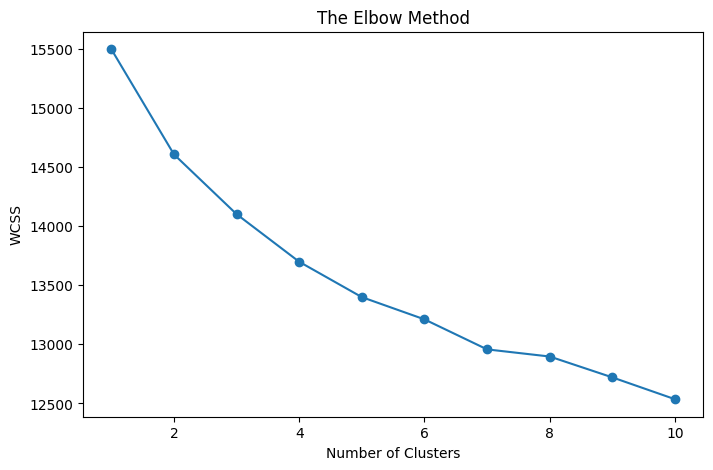

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(range(1,11),wcss,marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
model = KMeans(n_clusters=2,init='k-means++',random_state=42)
y_kmeans = model.fit_predict(genai)
y_kmeans
genai['cluster'] = y_kmeans
genai

,id,post_id,platform,timestamp,date,time,month,weekday,country,city,...,toxicity_score,model_signature,detected_synthetic_score,embedding_sim_to_facts,factcheck_verdict,external_factchecks_count,source_domain_reliability,engagement,is_misinformation,cluster
0,-1.728590,-1.728590,-0.454352,-1.354466,-1.339175,-0.251698,0.585904,1.534175,1.391194,1.164266,...,-0.777705,-1.268727,1.171349,-0.570224,0.493483,0.837535,0.136826,-0.517270,0.930415,0
1,-1.721662,-1.721662,-0.454352,1.659308,1.637579,0.900631,-1.324653,0.546297,-0.718807,-1.468737,...,1.058104,-1.268727,-1.398924,1.648929,-1.341027,0.244380,-1.055373,0.778488,-1.074789,0
2,-1.714734,-1.714734,0.433055,0.308306,0.321327,-1.248749,-1.006227,-1.429460,1.391194,1.164266,...,1.103048,-1.268727,0.755470,0.740133,-0.423772,-1.535086,-1.488585,0.643456,-1.074789,0
3,-1.707806,-1.707806,1.320461,-1.084266,-1.106300,-0.627635,-1.643079,-1.429460,1.391194,-0.750645,...,-1.313582,-0.029736,1.287250,0.366752,-1.341027,-0.348775,-1.523242,0.710454,0.930415,0
4,-1.700877,-1.700877,0.433055,-0.723999,-0.711424,-0.791086,0.267478,-1.429460,-0.718807,-0.271917,...,-0.591013,-1.268727,0.833873,0.419589,-0.423772,-1.535086,-0.109239,1.009528,-1.074789,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1.700877,1.700877,-0.454352,-0.377588,-0.397549,0.737180,-0.050948,1.534175,0.687860,-1.229373,...,-0.269487,-0.029736,0.905459,-1.471975,-1.341027,1.430691,-0.788515,-0.074530,-1.074789,1
496,1.707806,1.707806,0.433055,-0.294449,-0.316548,-1.330474,-1.324653,1.040236,-0.718807,-1.468737,...,1.673497,-1.268727,-1.422786,0.000416,0.493483,1.430691,1.620142,1.169771,-1.074789,1
497,1.714734,1.714734,-1.341759,0.536937,0.564328,1.448192,-0.687800,-0.441582,0.687860,-0.032553,...,-0.317889,-0.029736,0.861144,0.655594,-1.341027,0.244380,-0.542450,1.027487,-1.074789,1
498,1.721662,1.721662,1.320461,-0.266736,-0.276048,-1.665549,-1.324653,-0.935521,-1.422141,-0.990009,...,-0.801906,-0.029736,-0.955774,-0.126393,-0.423772,-0.348775,-0.750392,0.958071,0.930415,1


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(genai)
X_pca

array([[-2.65350587e+00, -1.62545602e+00],
       [-2.33004042e+00,  2.20562662e+00],
       [-2.45396644e+00,  3.33243387e-01],
       [-1.79381861e+00, -2.29513752e+00],
       [-2.21882212e+00, -8.93037128e-01],
       [-1.27532657e+00, -1.24050195e+00],
       [-1.56764624e+00,  2.13364810e+00],
       [-1.57296390e+00, -1.22294971e+00],
       [-1.57156309e+00,  2.34478975e+00],
       [-3.79187217e+00, -7.21066013e-01],
       [-2.17608665e+00, -6.48288478e-02],
       [-1.90231810e+00, -2.71993191e-01],
       [-1.92854188e+00, -1.29739352e+00],
       [-2.77128982e+00,  1.67130877e+00],
       [-2.15805290e+00, -8.61613528e-01],
       [-3.00047670e+00,  2.68876661e+00],
       [-2.62413397e+00, -1.61173093e+00],
       [-3.03043315e+00,  6.09259266e-01],
       [-2.73311499e+00,  8.63992241e-01],
       [-1.67736754e+00, -1.53983154e-01],
       [-2.71681850e+00,  2.92668384e+00],
       [-2.61660322e+00,  1.10594988e+00],
       [-2.33046163e+00,  6.62022227e-01],
       [-2.

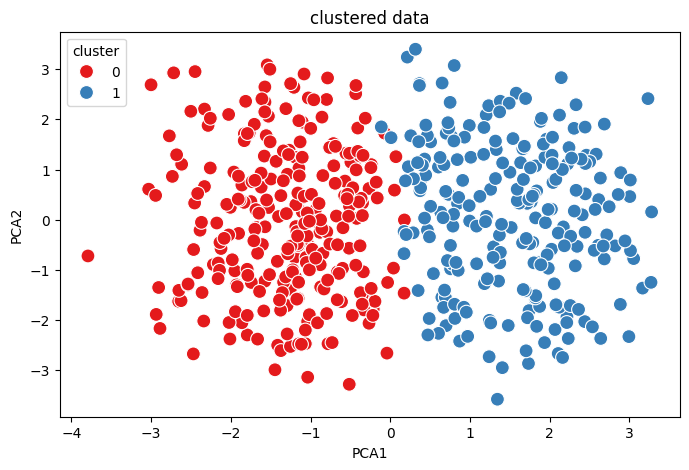

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=genai['cluster'], palette='Set1', s=100)
plt.title('clustered data')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()
